# Desarrollo de Arquitectura GCP

In this set of exercises, we will explore the implementation of solutions in Google Cloud Platform (GCP), aiming to automate processes related to the storage, processing, and visualization of user information.


## Index

1. [Exercise 1: Data Automation](#exercise-1)
2. [Exercise 2: Creation of a Web Application](#exercise-2)
3. [Exercise 3: Web Form Integration](#exercise-3)
4. [Exercise 4: DockerHub Packaging and Cloud Run Execution](#exercise-4)

## Exercise 1: Data Automation on Google Cloud Platform (GCP)

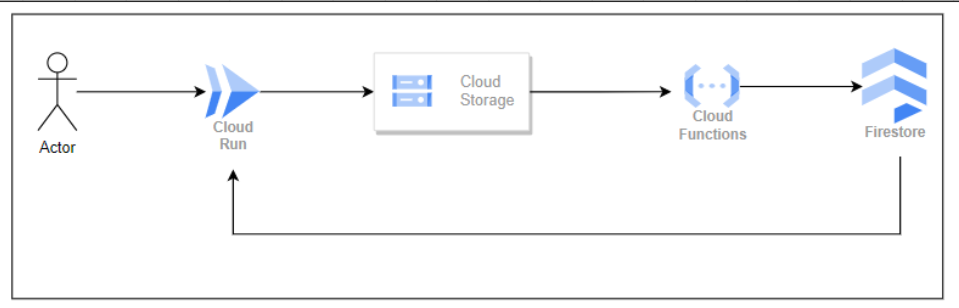

### Project Creation

```bash
gcloud init
gcloud projects create  gcp-final-project
gcloud config set project gcp-final-project
gcloud services enable storage-api.googleapis.com

```

### Cloud Storage Creation in GCP
Create a bucket in Cloud Storage to store JSON files.

```bash
gsutil mb -l europe-west1 gs://bucket_formulariojson

```
### Firestore Creation

```bash
gcloud firestore databases create --region=europe-west2 (availability not present in Belgium)

response:
  '@type': type.googleapis.com/google.firestore.admin.v1.Database
  appEngineIntegrationMode: DISABLED
  concurrencyMode: PESSIMISTIC
  createTime: '2023-11-16T09:42:24.323077Z'
  deleteProtectionState: DELETE_PROTECTION_DISABLED
  earliestVersionTime: '2023-11-16T09:42:24.323077Z'
  etag: IKiEmLKdyIIDMIXcl7KdyIID
  keyPrefix: g
  locationId: europe-west2
  name: projects/gcp-final-project-405308/databases/(default)
  pointInTimeRecoveryEnablement: POINT_IN_TIME_RECOVERY_DISABLED
  type: FIRESTORE_NATIVE
  uid: 126c96a0-b2c6-452c-8c6b-8c6025a52aa7
  updateTime: '2023-11-16T09:42:24.323077Z'
  versionRetentionPeriod: 3600s
```

### Cloud Build Creation
For continuous implementation of changes in the working repository, create a Cloud Build for deploying the Cloud Function.
```bash
gcloud services enable cloudresourcemanager.googleapis.com
gcloud services enable cloudfunctions.googleapis.com
gcloud auth application-default login
gcloud projects add-iam-policy-binding gcp-final-project-405308 --member="user:gcp-final-project-405308@appspot.gserviceaccount.com" --role=roles/cloudfunctions.functions.get


gcloud beta builds triggers create cloud-source-repositories \
    --repo=googlecloud_proyecto \
    --branch-pattern=main \
    --build-config=cloudbuild.yaml \
    --region=europe-west1




```yaml
steps:
  - name: 'gcr.io/cloud-builders/gcloud'
    args:
      - functions
      - deploy
      - function_proyectofinal_gcp
      - --region=europe-west1
      - --runtime
      - python39
      - --trigger-bucket
      - gs://bucket_formulariojson
      - --source=./app
      - --allow-unauthenticated
```
### Creación de Cloud Function en GCP
Crear una función en Cloud Functions que se active cuando se cargue un archivo json en Cloud Storage. Utilizar el lenguaje de programación Python.
gcloud functions deploy function_proyectofinal_gcp \
  --region=europe-west1 \
  --runtime python39 \
  --trigger-bucket=gs://bucket_formulariojson \
  --source ./app \
  --allow-unauthenticated \
  --entry-point cloud_function_handler


import json
from google.cloud import storage
from google.cloud import firestore

db = firestore.Client()
try:
    db.collection('mi-ejercicio-gcp').add({})  # Puedes agregar un documento vacío si solo quieres crear la colección
    print("Colección 'mi-ejercicio-gcp' creada correctamente.")
except Exception as e:
    print(f"Error al crear la colección: {e}")

def function_proyectofinal_gcp(data, context):
    # Obtiene el nombre del bucket y la clave del archivo JSON del evento de GCS
    bucket = data['bucket']
    key = data['name']
    print(bucket)
    print(key)

    # Descarga el archivo JSON desde GCS
    bucket_obj = storage_client.get_bucket(bucket)
    blob = bucket_obj.blob(key)
    json_data = blob.download_as_text()

    # Parsea el JSON
    data = json.loads(json_data)

    # Inserta los datos en Firestore
    db.collection('mi-ejercicio-gcp').document().set({
        'ID': data['ID'],
        'Nombre': data['Nombre'],
        'Correo electrónico': data['Correo electrónico'],
        'Fecha de registro': data['Fecha de registro']
    })

    

## Ejercicio 2: Creación de una Aplicación Web
El segundo ejercicio trata sobre la creación de una aplicación web para visualizar la base de datos de usuarios almacenada en firestore/cloudstorage.

## Ejercicio 3: Integración de Formulario Web
El tercer ejercicio, implica la creación de un formulario web para el upload de archivos en cloud storage.implementación de un menú de navegación que permita acceder a los datos de usuarios y a la carga de archivos.

## Ejercicio 4: Empaquetar todo el proyecto en DockerHub y ejecutarlo con CLoud Run


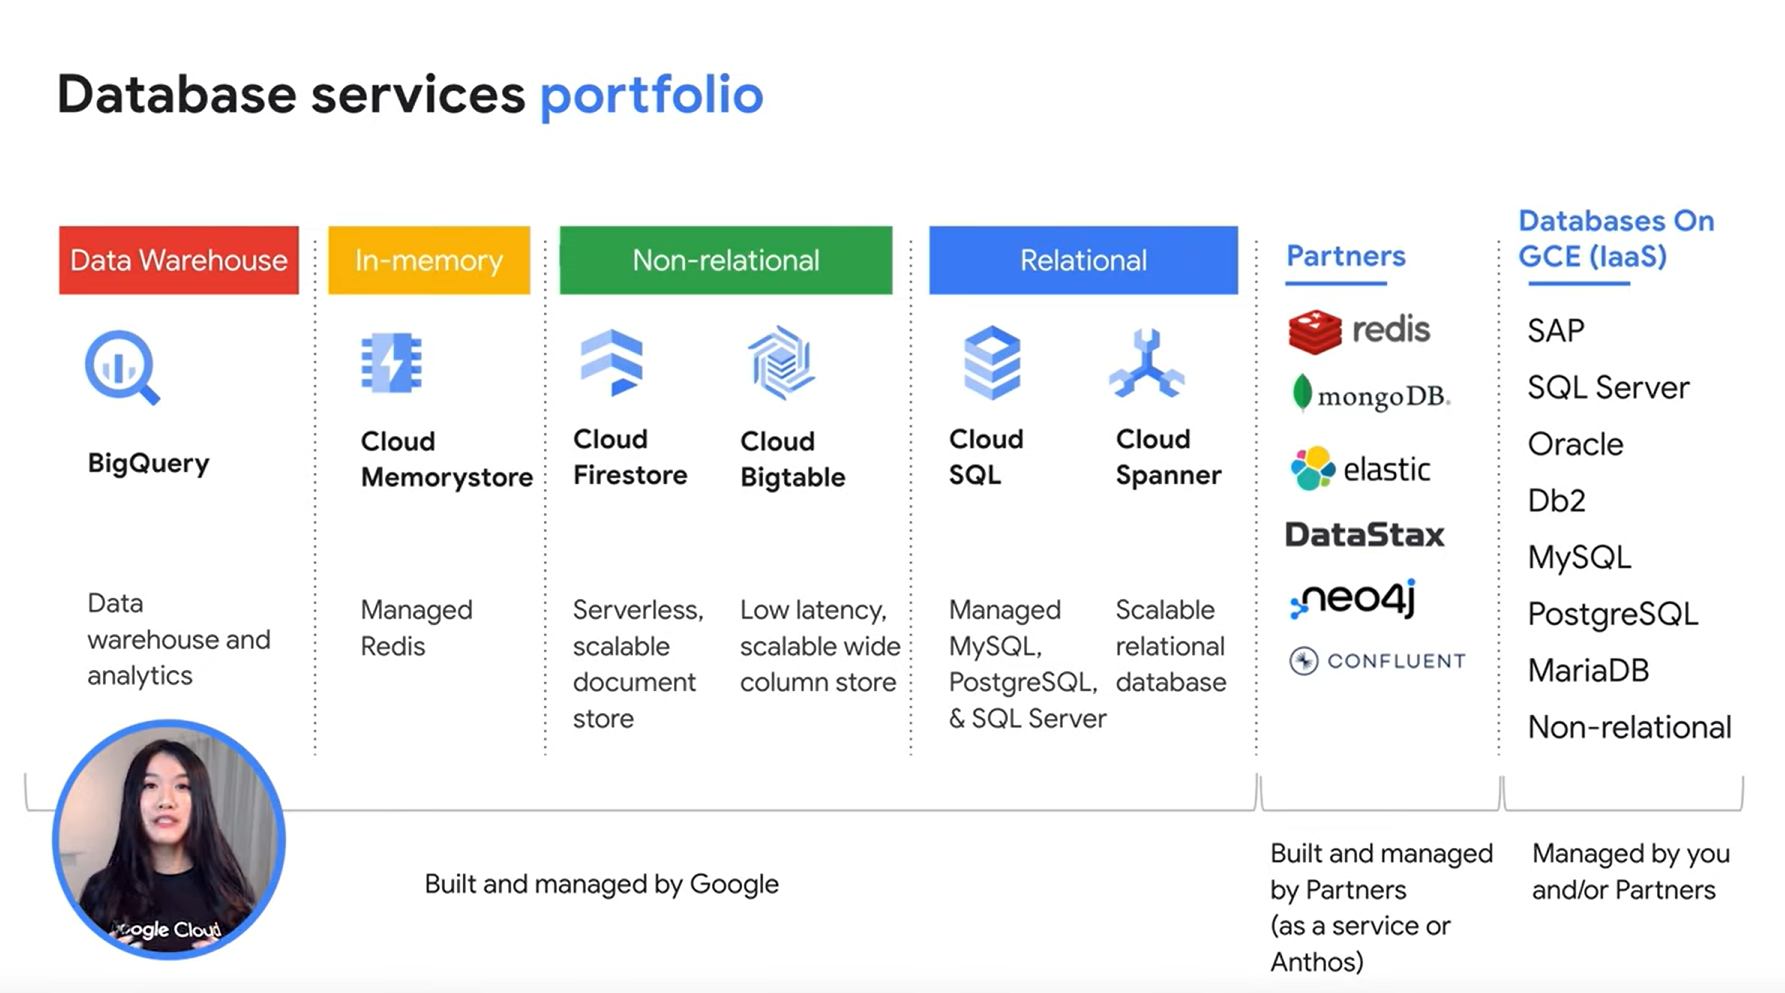

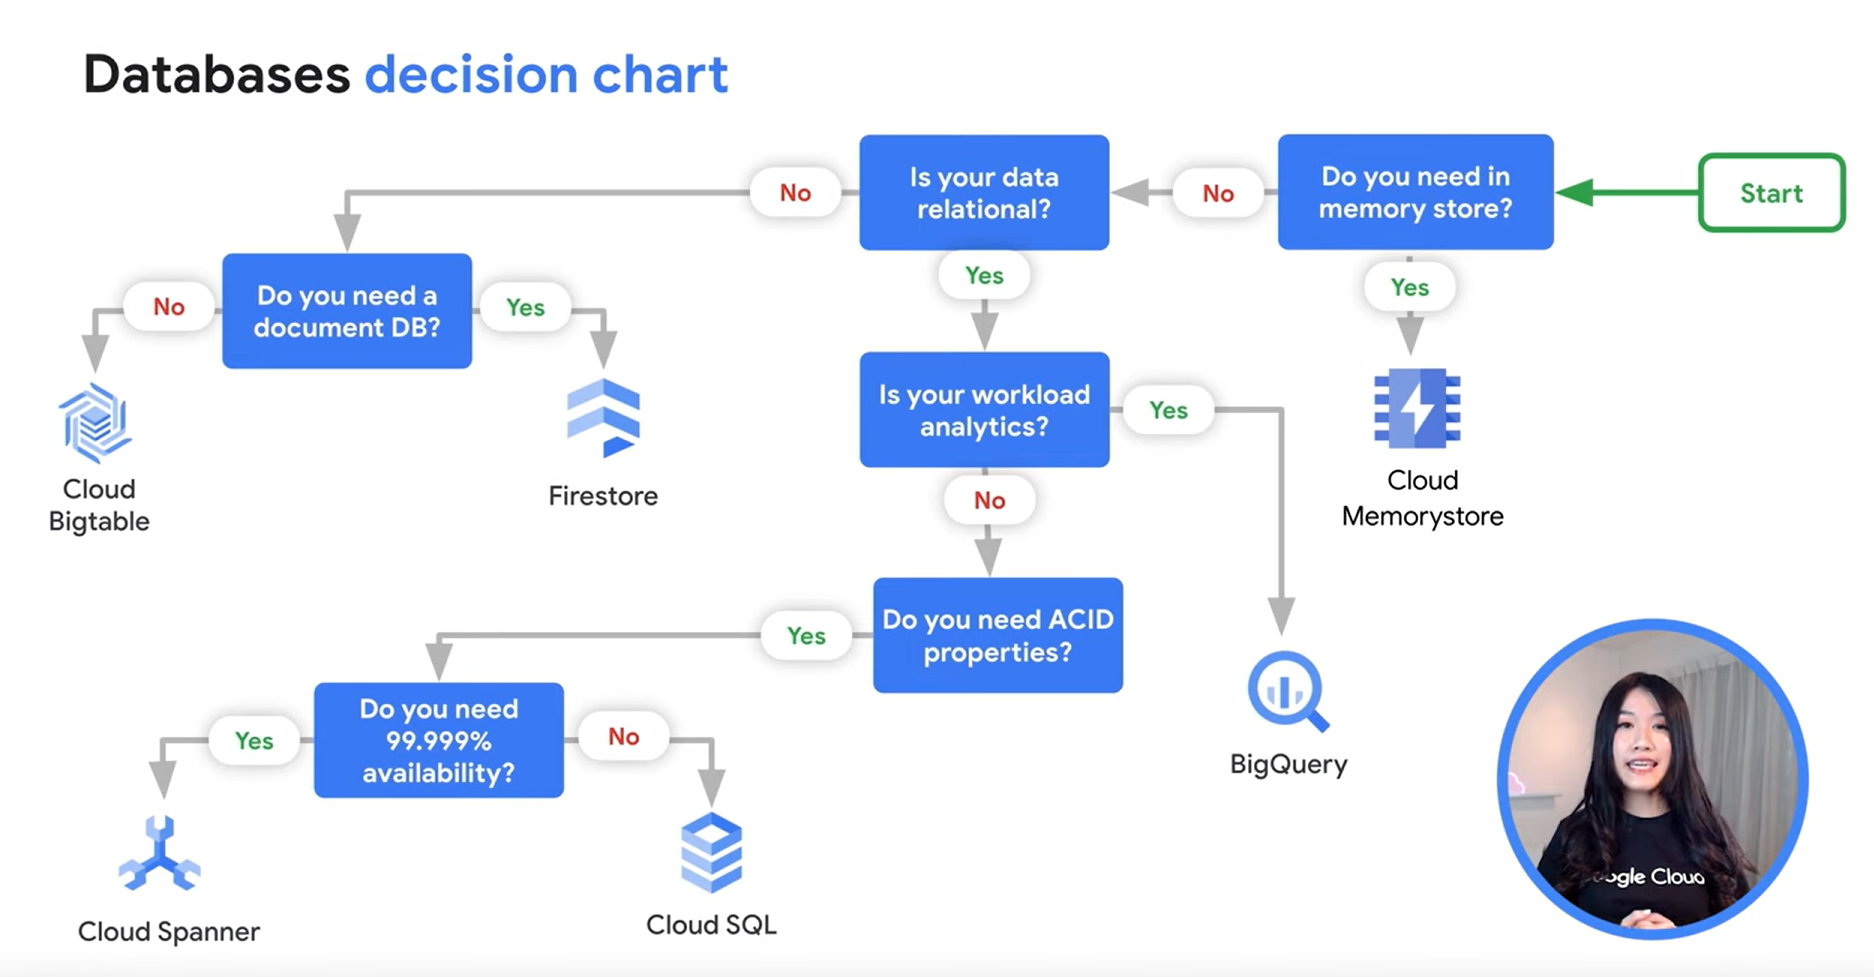